<a href="https://colab.research.google.com/github/amit2507a/Placement-report-analysis/blob/main/Placement_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

#load the dataset
df=pd.read_csv("/content/drive/MyDrive/placement prediction dataset/Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0




sscb- Secondary School Certificate Board-> Which is lower secondary school(1st-10th Grade)

hscb-Higher Secondary Certificate Board-> Which is higher secondary school(11th and 12th Grade)

sl_no : serial number

gender : [male,female]

ssc_p : means--> 10th class percentage

ssc_b : which board to passed out 10th.

hsc_p : means--> 12th class percentage

hsc_b : which board to passed out 12th.

hsc_s : which stream he choose (science,commerce,arts)

degree_p : means--> Bachelor degree percentage

degree_t : which strem choose for bachelor

workex : It has a work experience or not.

etest_p : entrance test percentage

specialisation : Master degree in Mkt&HR or Mkt&Fin

mba_p : means--> Master degree percentage
status : He/She got placed or not in campus placement.

salary : placement packages.

In [ ]:
#set the sl_no as a row no
df.set_index('sl_no',inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
#check datatype or null 
#prints information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [ ]:
df.describe()


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
print(df.shape[0]) # nummber of rows
print(df.shape[1]) # total number of columns

215
14


In [ ]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
# Replace the value with 0,1 
df["gender"].replace(["F","M"],[0,1],inplace=True)
df["status"].replace(['Placed',"Not Placed"],[1,0],inplace=True)

df['workex'].replace(to_replace ="Yes", value =1,inplace=True) 
df['workex'].replace(to_replace ="No", value =0,inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,NaN
5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


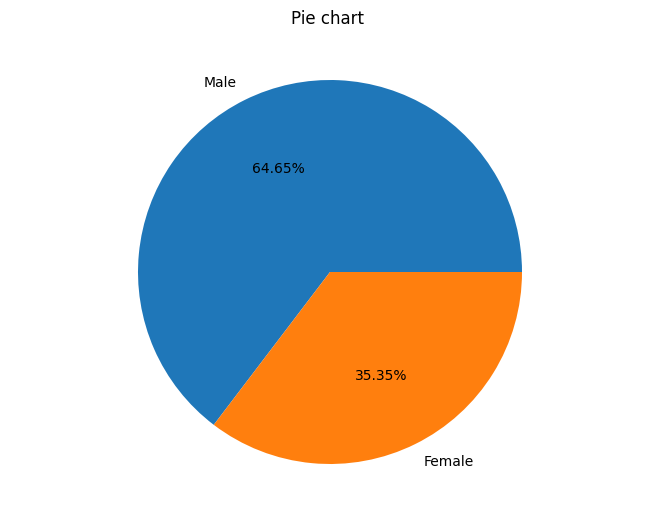

In [ ]:
# percentage of male or female
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
gender = ['Male','Female']
students = [139,76]
ax.pie(students, labels = gender,autopct='%1.2f%%',colors = ["#1f77b9", "#ff7f0e"])
plt.title('Pie chart ')
plt.show()

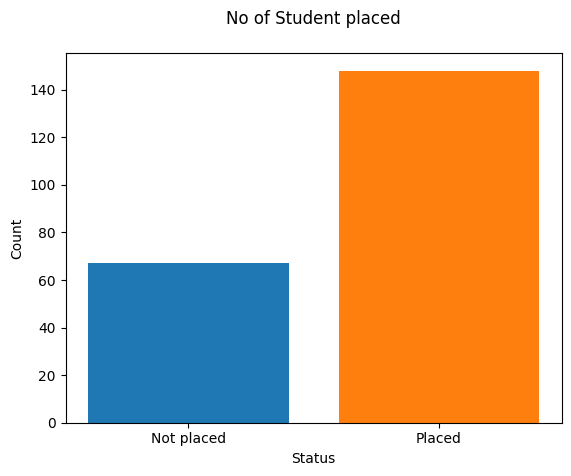

In [ ]:
#show the no. of student how placed or not placed.
plt.bar([0],height=len(df[df["status"]==0]))
plt.bar([1],height=len(df[df["status"]==1]))

plt.xlabel("Status")
plt.ylabel("Count")

plt.xticks(np.arange(2), ('Not placed', 'Placed'))
plt.title("No of Student placed\n")
plt.show()

In [ ]:
#create a new dataframe of only numerical values
numerical_df=df.select_dtypes(["float64","int64"])

scc_p mean = 67.30339534883721
hsc_p mean = 66.33316279069768
mba_p mean = 62.278186046511635
degree_p mean = 66.37018604651163


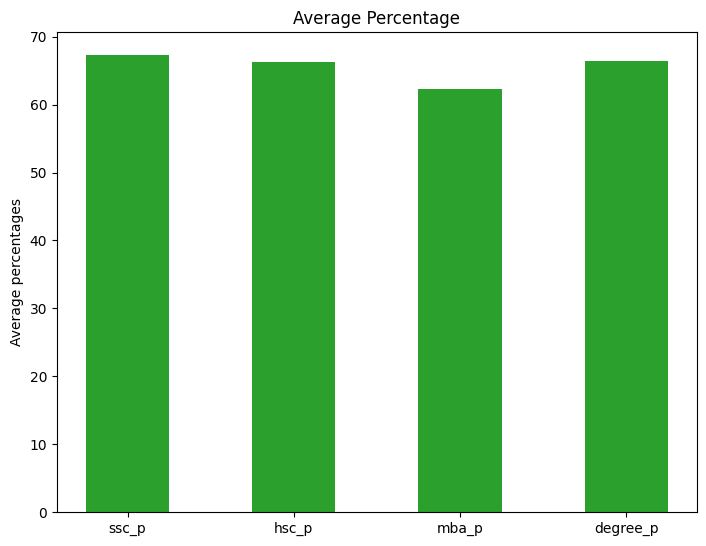

In [ ]:
#average percentage of all education qualification
values = [(numerical_df['ssc_p'].mean()),(numerical_df['hsc_p'].mean()),(numerical_df['mba_p'].mean()),(numerical_df['degree_p'].mean())]
print('scc_p mean = ' +str(numerical_df['ssc_p'].mean()))
print('hsc_p mean = ' +str(numerical_df['hsc_p'].mean()))
print('mba_p mean = ' +str(numerical_df['mba_p'].mean()))
print('degree_p mean = ' +str(numerical_df['degree_p'].mean()))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['ssc_p','hsc_p','mba_p','degree_p']
ax.set_ylabel('Average percentages')
ax.set_title('Average Percentage')
ax.bar(names,values,width = 0.5,color=["#2ca02c"])
plt.show()

**PLACEMENT PREDICTION**

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(df[['ssc_p','hsc_p','degree_p','workex','etest_p','mba_p']],df.status,test_size=0.2)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


**RANDOM FOREST CLASSIFICATION**

In [ ]:
# Fitting Random Forest Classification to the Training set
accuracy_scores = np.zeros(4)
def rfc_model(x_train,y_train,x_test,y_test):
   
    '''
    Input
      x_train :training featue
      x_test  :test featue
      y_train :training output data
      y_test  :testing  output data
       
    Output :
     accuracy_score       :
     classification_report:
    '''
    print("using Random Forest Classification method")
    model=RandomForestClassifier(n_estimators =14, criterion = 'entropy', random_state = 41)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('Accuracy {0:.2f}%'.format((accuracy_score(y_test,prediction)*100)))
    print(classification_report(y_test,prediction))
    accuracy_scores[0] = accuracy_score(y_test, prediction)*100
rfc_model(x_train,y_train,x_test,y_test)
print('Randon Forest Classifier accuracy: {}%'.format(accuracy_scores[0]))

using Random Forest Classification method
Accuracy 76.74%
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.82      0.88      0.85        32

    accuracy                           0.77        43
   macro avg       0.69      0.66      0.67        43
weighted avg       0.75      0.77      0.76        43

Randon Forest Classifier accuracy: 76.74418604651163%


**K NEAREST NEIGHBOUR**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
result_1 = pd.DataFrame(columns=['Model','Accuracy Score'])
#K Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
weights = ['uniform','distance']
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
metric = ['minkowski','euclidean','manhattan']
algorithm=['auto']
p=[1,2]
knn_hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p, metric=metric)
KNN_gridSearch = RandomizedSearchCV(knn,param_distributions=knn_hyperparameters,cv=3,verbose=1)
KNN_gridSearch.fit(x_train,y_train)
knn_y_pred = KNN_gridSearch.predict(x_test)
print('KNN Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y_test,knn_y_pred))
print('\n Classification Report')
print(classification_report(y_test,knn_y_pred))
knn_AS = accuracy_score(y_test,knn_y_pred)

accuracy_scores[1] = accuracy_score(y_test,knn_y_pred)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[1]))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
KNN Classifier

 Confusion Matrix
[[ 6  5]
 [ 0 32]]

 Classification Report
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.86      1.00      0.93        32

    accuracy                           0.88        43
   macro avg       0.93      0.77      0.82        43
weighted avg       0.90      0.88      0.87        43

K Nearest Neighbors Classifier accuracy: 88.37209302325581%


**SVM**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
C = [0.1, 1, 10, 100, 1000]
kernel = ['rbf','poly','sigmoid','linear']
degree = list(range(1,5,1))
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
svc_hyperparameters = dict(C=C, kernel=kernel, degree=degree, gamma=gamma)
svc_gridSearch = RandomizedSearchCV(svc,param_distributions=svc_hyperparameters,cv=3,verbose=1)
svc_gridSearch.fit(x_train,y_train)
svc_y_pred = svc_gridSearch.predict(x_test)
print('Support Vector Machine (SVC)')
print('\n Confusion Matrix')
print(confusion_matrix(y_test,svc_y_pred))
print('\n Classification Report')
print(classification_report(y_test,svc_y_pred))
svc_AS = accuracy_score(y_test,svc_y_pred)
accuracy_scores[2] = accuracy_score(y_test,svc_y_pred)*100
print('SVM Classifier accuracy: {}%'.format(accuracy_scores[2]))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Support Vector Machine (SVC)

 Confusion Matrix
[[ 6  5]
 [ 0 32]]

 Classification Report
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.86      1.00      0.93        32

    accuracy                           0.88        43
   macro avg       0.93      0.77      0.82        43
weighted avg       0.90      0.88      0.87        43

SVM Classifier accuracy: 88.37209302325581%


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
criterion=['gini','entropy']
splitter=['best', 'random']
max_depth = list(range(10,100,10))
min_samples_split = [2, 5, 10]
max_features = ['auto', 'sqrt','log2',None]
max_depth = list(range(10,100,10))
min_samples_leaf = [1, 2, 4]
dtc_hyperparameters = dict(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features, min_samples_leaf=min_samples_leaf)
dtc_gridSearch = RandomizedSearchCV(dtc,param_distributions=dtc_hyperparameters,cv=3,verbose=1)
dtc_gridSearch.fit(x_train,y_train)
dtc_y_pred = dtc_gridSearch.predict(x_test)
print('Decision Tree Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y_test,dtc_y_pred))
print('\n Classification Report')
print(classification_report(y_test,dtc_y_pred))
dtc_AS = accuracy_score(y_test,dtc_y_pred)
accuracy_scores[3] = accuracy_score(y_test,dtc_y_pred)*100
print('decision tree Classifier accuracy: {}%'.format(accuracy_scores[3]))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Decision Tree Classifier

 Confusion Matrix
[[ 7  4]
 [ 3 29]]

 Classification Report
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.88      0.91      0.89        32

    accuracy                           0.84        43
   macro avg       0.79      0.77      0.78        43
weighted avg       0.83      0.84      0.83        43

decision tree Classifier accuracy: 83.72093023255815%


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9